# Lasso Regression (L1 Regularization)

লাসো রিগ্রেশন হলো একটি রেগুলারাইজেশন টেকনিক যা ফিচার সিলেকশনে সাহায্য করে।

## Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

## Create Sample Dataset

In [2]:
# Create a synthetic dataset with some irrelevant features
X, y = make_regression(n_samples=100, n_features=10, n_informative=5, 
                       noise=10, random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

Training set: (70, 10)
Test set: (30, 10)


## Scale the Features

In [3]:
# Feature scaling is important for Lasso
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Compare Linear Regression vs Lasso Regression

In [4]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Lasso Regression with different alpha values
lasso_1 = Lasso(alpha=1.0)
lasso_1.fit(X_train_scaled, y_train)

lasso_10 = Lasso(alpha=10.0)
lasso_10.fit(X_train_scaled, y_train)

Lasso(alpha=10.0)

## Compare Coefficients

In [5]:
# Create a comparison DataFrame
coeff_comparison = pd.DataFrame({
    'Feature': [f'Feature_{i}' for i in range(10)],
    'Linear_Regression': lr.coef_,
    'Lasso_alpha_1': lasso_1.coef_,
    'Lasso_alpha_10': lasso_10.coef_
})

print("Coefficients Comparison:")
print(coeff_comparison.round(3))

Coefficients Comparison:
     Feature  Linear_Regression  Lasso_alpha_1  Lasso_alpha_10
0  Feature_0             13.472         12.378           2.309
1  Feature_1             -0.675         -0.000          -0.000
2  Feature_2              0.806          0.000           0.000
3  Feature_3             59.244         58.533          51.029
4  Feature_4              1.999          0.494          -0.000
5  Feature_5             67.394         66.134          56.217
6  Feature_6             -0.176         -0.000           0.000
7  Feature_7              9.904          8.318           0.000
8  Feature_8              4.172          2.789           0.000
9  Feature_9             -0.502         -0.000          -0.000


## Visualize Coefficients

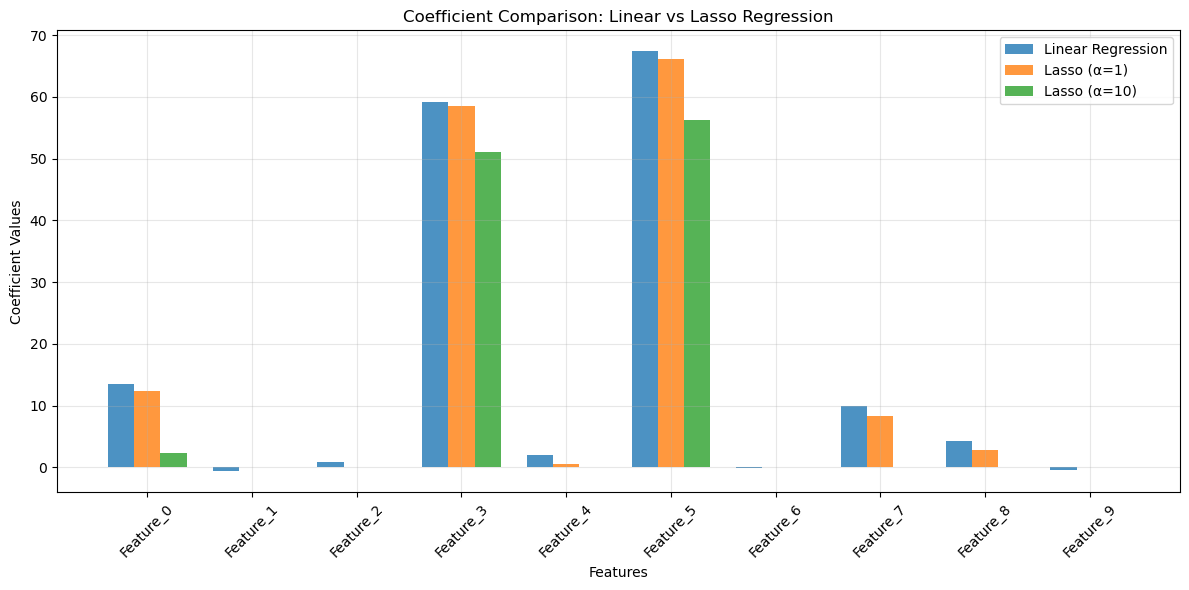

In [6]:
plt.figure(figsize=(12, 6))

x_pos = np.arange(len(coeff_comparison['Feature']))
width = 0.25

plt.bar(x_pos - width, coeff_comparison['Linear_Regression'], width, 
        label='Linear Regression', alpha=0.8)
plt.bar(x_pos, coeff_comparison['Lasso_alpha_1'], width, 
        label='Lasso (α=1)', alpha=0.8)
plt.bar(x_pos + width, coeff_comparison['Lasso_alpha_10'], width, 
        label='Lasso (α=10)', alpha=0.8)

plt.xlabel('Features')
plt.ylabel('Coefficient Values')
plt.title('Coefficient Comparison: Linear vs Lasso Regression')
plt.xticks(x_pos, coeff_comparison['Feature'], rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Count Non-Zero Coefficients

In [7]:
# Count non-zero coefficients
print("Non-zero coefficients count:")
print(f"Linear Regression: {np.sum(np.abs(lr.coef_) > 1e-10)}")
print(f"Lasso (α=1): {np.sum(np.abs(lasso_1.coef_) > 1e-10)}")
print(f"Lasso (α=10): {np.sum(np.abs(lasso_10.coef_) > 1e-10)}")

Non-zero coefficients count:
Linear Regression: 10
Lasso (α=1): 6
Lasso (α=10): 3


## Model Performance Comparison

In [8]:
# Predictions
y_pred_lr = lr.predict(X_test_scaled)
y_pred_lasso_1 = lasso_1.predict(X_test_scaled)
y_pred_lasso_10 = lasso_10.predict(X_test_scaled)

# Performance metrics
models = ['Linear Regression', 'Lasso (α=1)', 'Lasso (α=10)']
predictions = [y_pred_lr, y_pred_lasso_1, y_pred_lasso_10]

performance = pd.DataFrame({
    'Model': models,
    'MSE': [mean_squared_error(y_test, pred) for pred in predictions],
    'R2_Score': [r2_score(y_test, pred) for pred in predictions]
})

print("Model Performance:")
print(performance.round(4))

Model Performance:
               Model       MSE  R2_Score
0  Linear Regression  128.7276    0.9899
1        Lasso (α=1)  145.8558    0.9885
2       Lasso (α=10)  944.4590    0.9258


## Feature Selection with Different Alpha Values

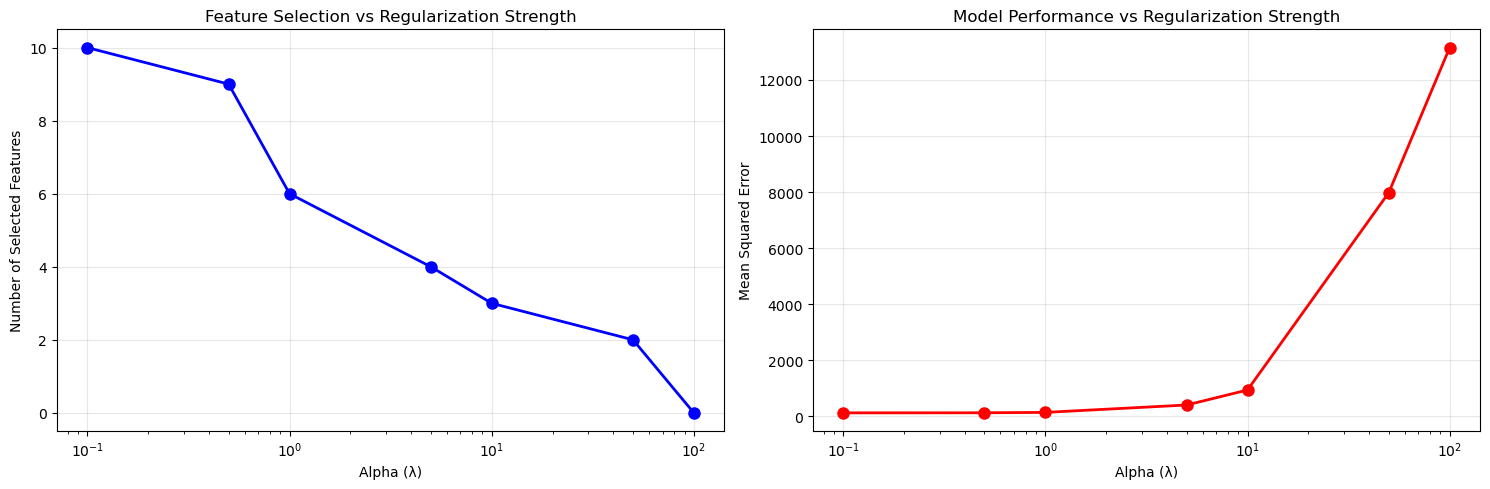

In [9]:
# Test different alpha values
alphas = [0.1, 0.5, 1, 5, 10, 50, 100]
feature_counts = []
mse_scores = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_scaled, y_train)
    
    # Count non-zero features
    non_zero_features = np.sum(np.abs(lasso.coef_) > 1e-10)
    feature_counts.append(non_zero_features)
    
    # Calculate MSE
    y_pred = lasso.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Feature count vs Alpha
ax1.plot(alphas, feature_counts, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Alpha (λ)')
ax1.set_ylabel('Number of Selected Features')
ax1.set_title('Feature Selection vs Regularization Strength')
ax1.set_xscale('log')
ax1.grid(True, alpha=0.3)

# MSE vs Alpha
ax2.plot(alphas, mse_scores, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Alpha (λ)')
ax2.set_ylabel('Mean Squared Error')
ax2.set_title('Model Performance vs Regularization Strength')
ax2.set_xscale('log')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Summary Results

In [10]:
# Create summary table
summary = pd.DataFrame({
    'Alpha': alphas,
    'Selected_Features': feature_counts,
    'MSE': mse_scores
})

print("Alpha vs Feature Selection Summary:")
print(summary.round(4))

Alpha vs Feature Selection Summary:
   Alpha  Selected_Features         MSE
0    0.1                 10    129.2590
1    0.5                  9    132.0665
2    1.0                  6    145.8558
3    5.0                  4    409.3387
4   10.0                  3    944.4590
5   50.0                  2   7983.0787
6  100.0                  0  13153.1703


## Key Insights

1. **Lasso Regression** automatically performs feature selection by setting some coefficients to zero.
2. As **alpha (λ) increases**, more features are eliminated from the model.
3. Higher alpha values lead to simpler models with fewer features.
4. There's a trade-off between model simplicity and performance.
5. **Feature scaling** is important for Lasso regression.

**বাংলায়:**
- লাসো রিগ্রেশন অপ্রয়োজনীয় ফিচার অটোমেটিক বাদ দেয়
- Alpha (λ) বাড়লে আরও ফিচার বাদ যায়
- সঠিক Alpha নির্বাচন করা গুরুত্বপূর্ণ